during the ETLT
1. combine both motorist and sgcarmart
2. names to be extracted -> brand and model 
3. fetch data from API
4. combine both APIs together to get 1 dataset
5. derive the vehicle classes
6. fetch the COE prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
# read dataset first
data = pd.read_csv('./datasets/final_combined_dataset.csv')

# Data Processing

In [3]:
# replace all hidden values with NA
# data.replace(to_replace=r'.*hidden.*', value=pd.NA, regex=True, inplace=True)

In [4]:
# checking the data types
data.dtypes

model                       object
price                        int64
depreciation                 int64
mileage                      int64
eng_cap                      int64
power                        int64
reg_date                    object
coe_left                   float64
no_of_owner                  int64
omv                          int64
arf                          int64
accessories                 object
model_make_id               object
model_name                  object
model_trim                  object
model_year                 float64
model_body                  object
model_engine_cyl            object
model_engine_fuel           object
model_drive                 object
model_transmission_type     object
model_seats                float64
model_weight_kg            float64
model_fuel_cap_l           float64
dtype: object

In [5]:
# converting to integers
data['model_year'] = data['model_year'].astype("Int64")
data['model_seats'] = data['model_seats'].astype("Int64")

# 2dp 
data['model_weight_kg'] = data['model_weight_kg'].round(2)
data['model_fuel_cap_l'] = data['model_fuel_cap_l'].round(2)

# converting to datetime
data['reg_date'] = pd.to_datetime(data['reg_date'])

# drop model trim
columns_to_drop = ['model_trim', 'accessories', 'model_make_id', 'model_name']
data = data.drop(columns=columns_to_drop)

## Encoding Model Body

In [6]:
# before replacing data 
print(data['model_body'].value_counts())

model_body
Sedan                           785
SUV                             729
Hatchback                       474
Convertible                     232
Coupe                           223
Compact Cars                    105
Sport Utility Vehicles           66
Minivan                          62
Midsize Cars                     54
Large Cars                       14
Mini Compact Cars                14
Wagon                            11
Station Wagon                    10
Two Seaters                       9
Subcompact Cars                   4
Crossover                         4
Small Station Wagons              3
Small Sport Utility Vehicles      1
Name: count, dtype: int64


In [7]:
# encode model_body

for index, row in data.iterrows():
    row['model_body'] = row['model_body'].lower()
    if 'sport' in row['model_body']:
        data.at[index, 'model_body'] ='SUV'
    elif 'compact' in row['model_body'] or 'subcompact' in row['model_body']:
        data.at[index, 'model_body'] ='Compact Cars'
    elif 'manual' in row['model_body']:
        data.at[index, 'model_body'] ='Manual'
    elif 'wagon' in row['model_body']:
        data.at[index, 'model_body'] ='Wagon'
        
# after replacing data 
print(data['model_body'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_body'], drop_first=True)

model_body
SUV             796
Sedan           785
Hatchback       474
Convertible     232
Coupe           223
Compact Cars    123
Minivan          62
Midsize Cars     54
Wagon            24
Large Cars       14
Two Seaters       9
Crossover         4
Name: count, dtype: int64


## Encoding Model Transmission Type

In [8]:
# before replacing data 
print(data['model_transmission_type'].value_counts())

model_transmission_type
8-speed shiftable automatic              548
continuously variable-speed automatic    343
6-speed shiftable automatic              316
Manual                                   293
7-speed automated manual                 267
Automatic                                261
6-speed manual                           222
9-speed shiftable automatic              148
7-speed shiftable automatic              104
5-speed manual                            65
6-speed automated manual                  59
Automated Manual                          45
6-speed automatic                         30
4-speed automatic                         25
8-speed automatic                         21
8-speed automated manual                  16
10-speed shiftable automatic              12
7-speed manual                            11
CVT                                        8
6-speed manual                             2
7-speed automatic                          2
Single Speed                   

In [9]:
# encode transmission_type
for index, row in data.iterrows():
    row['model_transmission_type'] = row['model_transmission_type'].lower()
    if 'continuously' in row['model_transmission_type'] or 'single Speed' in row['model_transmission_type'] or 'cvt' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='CVT'
    elif 'automatic' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Automatic'
    elif 'manual' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Manual'
    elif 'automated manual' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Automated Manual'
    else:
        data.at[index, 'model_transmission_type'] ='Others'

# after replacing data
print(data['model_transmission_type'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_transmission_type'], drop_first=True)


model_transmission_type
Automatic    1468
Manual        980
CVT           351
Others          1
Name: count, dtype: int64


## Encoding Model Drive

In [10]:
# before replacing data 
print(data['model_drive'].value_counts())

model_drive
front wheel drive    1012
all wheel drive       645
rear wheel drive      435
Front                 207
Front Wheel Driv      129
Rear Wheel Drive      107
Rear                   87
AWD                    46
four wheel drive       45
4WD                    40
All Wheel Drive        36
AWD                     6
Four Wheel Drive        5
Name: count, dtype: int64


In [11]:
#encode model_drive
for index, row in data.iterrows():
    row['model_drive'] = row['model_drive'].lower()
    if 'all' in row['model_drive'] or '4wd' in row['model_drive'] or 'awd' in row['model_drive'] or 'four' in row['model_drive']:
        data.at[index, 'model_drive'] ='All Wheel Drive'
    elif 'front' in row['model_drive']:
        data.at[index, 'model_drive'] ='Front Wheel Drive'
    elif 'rear' in row['model_drive']:
        data.at[index, 'model_drive'] ='Rear Wheel Drive'
    else:
        data.at[index, 'model_drive'] ='Others'
        

# after replacing data
print(data['model_drive'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_drive'], drop_first=True)

model_drive
Front Wheel Drive    1348
All Wheel Drive       823
Rear Wheel Drive      629
Name: count, dtype: int64


## Encoding Model Engine Fuel

In [12]:
# before replacing data 
print(data['model_engine_fuel'].value_counts())

model_engine_fuel
premium unleaded (required)                     775
regular unleaded                                760
premium unleaded (recommended)                  565
Gasoline                                        273
Premium Unleaded (Required)                     120
Regular Unleaded                                 83
Gasoline - Premium                               76
Diesel                                           42
Premium Unleaded (Recommended)                   42
diesel fuel                                      28
Gasoline / Electric Hybrid                       17
Premium                                           7
flex-fuel (premium unleaded required/E85)         6
flex-fuel (premium unleaded recommended/E85)      3
Diesel / Electric Hybrid                          2
Electric                                          1
Name: count, dtype: int64


In [13]:
# encode transmission_type
for index, row in data.iterrows():
    row['model_engine_fuel'] = row['model_engine_fuel'].lower()
    if 'premium' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Premium'
    elif 'regular' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Regular'
    elif 'hybrid' in row['model_engine_fuel'] or 'gasoline' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Hybrid'
    elif 'gasoline' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Regular'
    elif 'diesel' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Diesel'
    elif 'electric' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Electric'
    else:
        print(row['model_engine_fuel'])
        data.at[index, 'model_engine_fuel'] ='Others'

# after replacing data

print(data['model_engine_fuel'].value_counts())


# nominal encoding
data = pd.get_dummies(data, columns=['model_engine_fuel'], drop_first=True)


model_engine_fuel
Premium     1594
Regular      843
Hybrid       292
Diesel        70
Electric       1
Name: count, dtype: int64


## Encoding Model Engine Cylinders

In [14]:
# before replacing data 
print(data['model_engine_cyl'].value_counts())

model_engine_cyl
I4        1559
4.0        418
V6         235
6.0        135
V8         121
flat 4     113
8.0         60
I6          57
12.0        16
5.0         16
I3          13
flat 6      13
W12         11
10.0        11
V10          7
I5           6
2.0          5
V12          2
3.0          2
Name: count, dtype: int64


In [15]:
# convert all values to string first
data['model_engine_cyl'] = data['model_engine_cyl'].astype("string")

for index, row in data.iterrows():
    row['model_engine_cyl'] = row['model_engine_cyl'].lower()
    if '2' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='2'
    elif '3' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='3'
    elif '4' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='4'
    elif '5' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='5'
    elif '6' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='6'
    elif '8' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='8'
    elif '10' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='10'
    elif '12' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='12'

    

#convert back to int
data['model_engine_cyl'] = data['model_engine_cyl'].astype("Int64")
# after replacing data
print(data['model_engine_cyl'].value_counts())

model_engine_cyl
4     2090
6      440
8      181
2       34
5       22
10      18
3       15
Name: count, dtype: Int64


# Change reg_date into numerical data

In [16]:
data['years_since_reg'] = 0

for i in range(len(data)):
    row = data.iloc[i]
    date = row['reg_date']
    year = date.year
    data.at[i, 'years_since_reg'] = 2024-year

data = data.drop(columns=['reg_date'])

## Encoding Model
we will classify the car models into 7 categories

In [17]:
brands = {
    'budget' : ['Chevrolet', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Toyota', 'Daihatsu', 'Proton'],
    'mid' : ['Alfa Romeo', 'Chrysler', 'Infiniti', 'MINI', 'Opel', 'Saab', 'Volkswagen', 'Audi', 'BMW', 'Jaguar', 'Jeep', 'Lexus', 'Lotus', 'Mercedes-Benz', 'Mercedes Benz', 'Mitsuoka', 'Volvo', 'Dodge Journey'],
    'exotic' : ['Aston Martin', 'Ferrari', 'Lamborghini', 'McLaren', 'Bentley', 'Land-Rover', 'Land Rover', 'Maserati', 'Porsche', 'Rolls-Royce', 'Rolls Royce']
}

In [18]:
data['brands'] = "others"

for i in range(len(data)):
    row = data.iloc[i]
    model = row['model']
    for group, brand_list in brands.items():
        for brand in brand_list:
            if brand.lower() in model.lower():
                data.at[i, 'brands'] = group
            


In [19]:
print(data['brands'].value_counts())

brands
mid       1439
budget    1022
exotic     339
Name: count, dtype: int64


In [20]:
# ordinal encoding of the car brands
ordinal_mapping = {
    'budget': 1,
    'mid': 2,
    'exotic' : 3
}
data['brands'] = data['brands'].map(ordinal_mapping)
data = data.drop(columns=['model'])

## Determine Vehicle Class and coe_prices

In [21]:
from datetime import datetime
data['vehicle_class'] = ""

for i in range(len(data)):
    row = data.iloc[i]
    if row['eng_cap'] <= 1600 and row['power'] <= 97:
        data.at[i, 'vehicle_class'] = 'A'
    else:
        data.at[i, 'vehicle_class'] = 'B'

# read coe_prices dataset
coe_prices = pd.read_csv('./datasets/coe_prices.csv')
coe_prices['month'] = pd.to_datetime(coe_prices['month'])


now = datetime.now()
current_month = str(now.year) + "-" + str(now.month)

current_coe_prices = coe_prices[coe_prices['month'] == current_month]

data['coe_price'] = 0
for i in range(len(data)):
    row = data.iloc[i]
    vehicle_class = "Category" + " " + str(row['vehicle_class'])
    coe_price = current_coe_prices[current_coe_prices['vehicle_class'] == vehicle_class]['pqp'].iloc[0]
    data.at[i, 'coe_price'] = coe_price

# we dont need the vehicle class anymore
data = data.drop(columns=['vehicle_class'])

In [22]:
data

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_cyl,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_transmission_type_Others,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,coe_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,4,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,8,1,98062
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,6,1,98062
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,4,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,7,1,98062
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,6,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,7,3,98062
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,6,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,6,2,98062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,2,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,6,3,98062
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,4,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,7,3,98062
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,6,1,98062
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,6,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,8,3,98062


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Plot with Features')

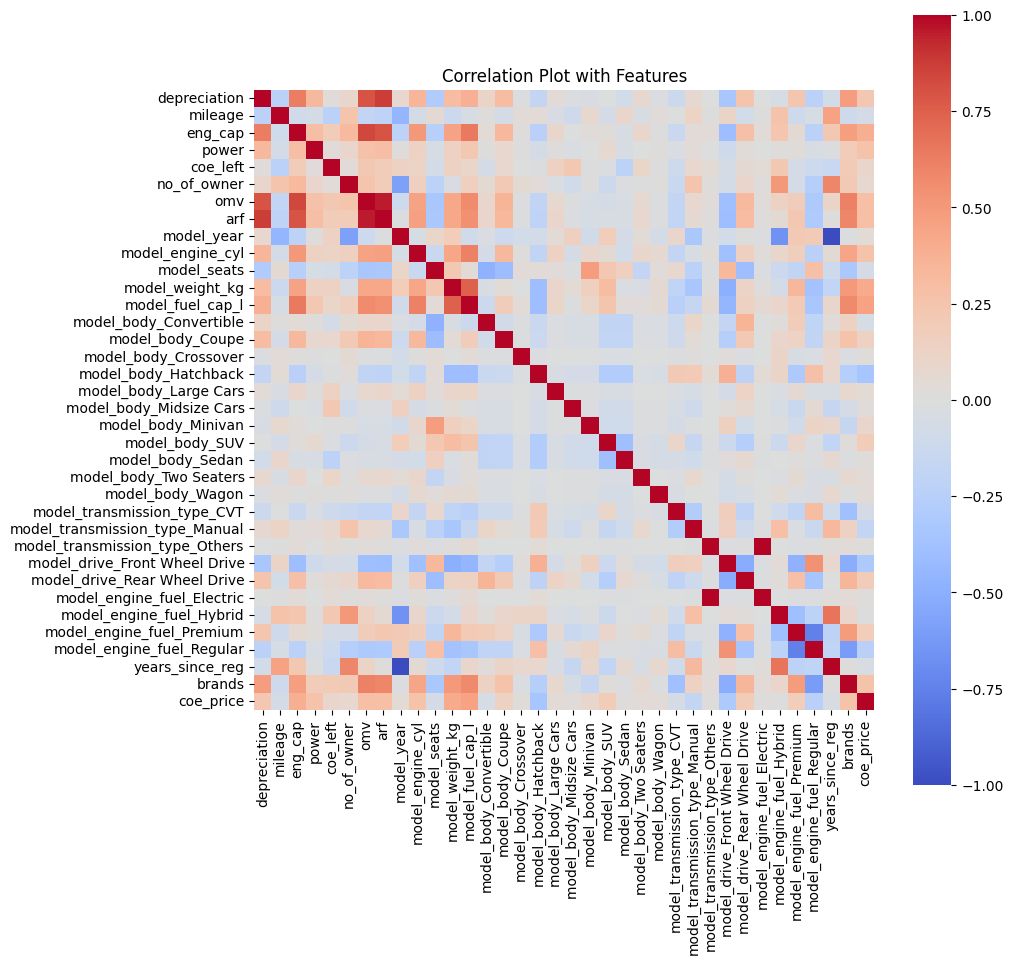

In [23]:
# plotting correlation heatmap between numeric variables

independent_vars = data.drop(columns=['price'])

correlation = independent_vars.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, cmap="coolwarm")
plt.title("Correlation Plot with Features")

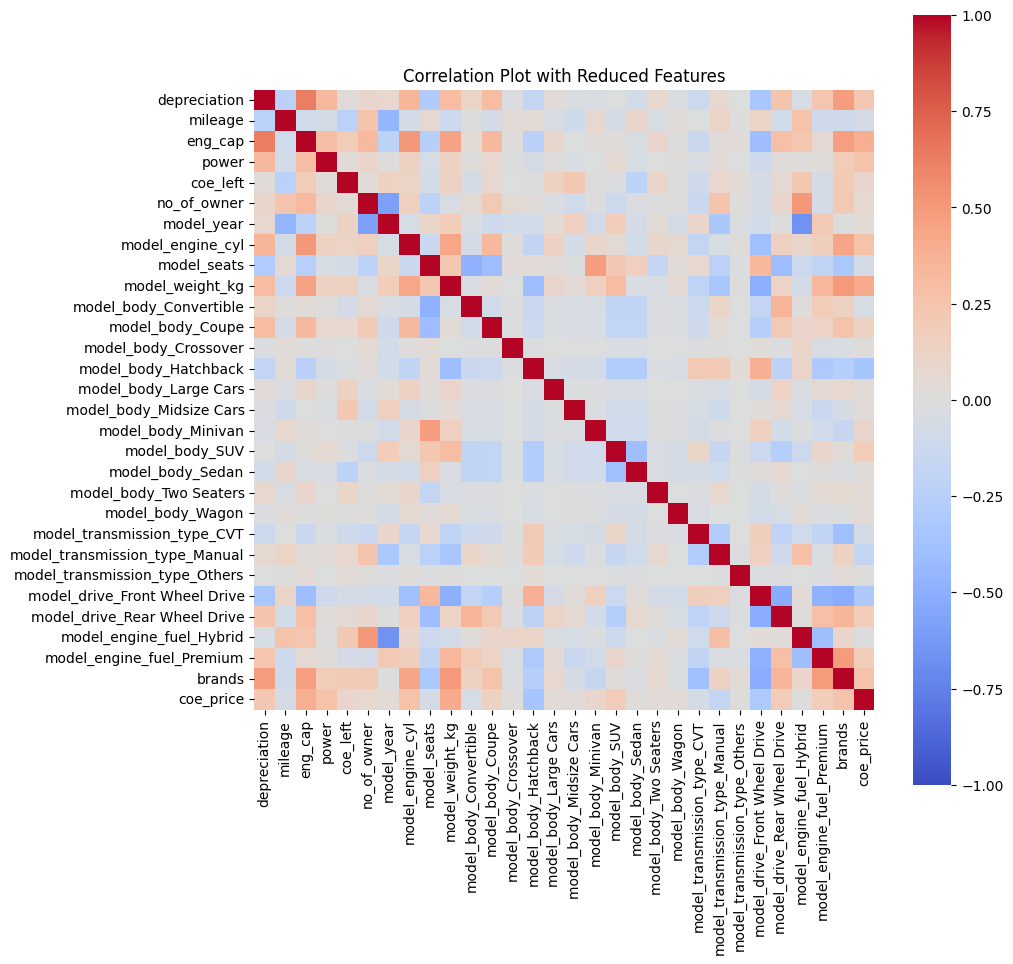

In [24]:
#identify pairs of highly correlated features
threshold = 0.7
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# find columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# remove these columns from the DataFrame
independent_vars = independent_vars.drop(columns=to_drop)

# calculate the corr again
corr_reduced = independent_vars.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_reduced, vmax=1, vmin=-1, square=True, cmap="coolwarm")
plt.title('Correlation Plot with Reduced Features')
plt.show()

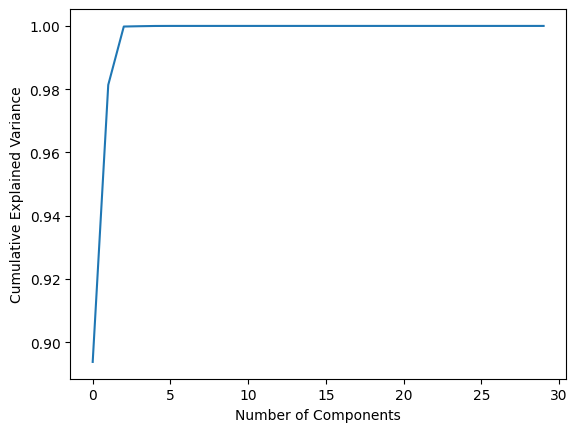

In [25]:
# # after combining do PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
Y = np.log10(data['price'])
X_pca = pca.fit_transform(independent_vars)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


choose 4 components since the curve looks like it flattens out at 4 components

In [26]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(independent_vars)

In [27]:
# split the data up for testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

# Linear Regression

MAE: 0.05782437063955081
MSE: 0.0067079938705807175
RMSE: 0.0819023434987102
R^2: 0.9092503325239337
Adjusted R^2: 0.9041038485460849


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


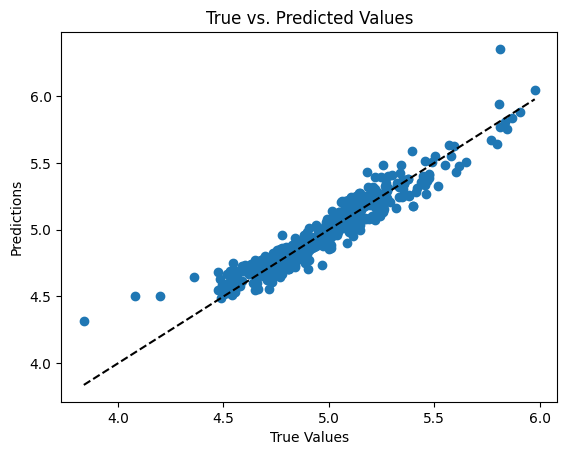

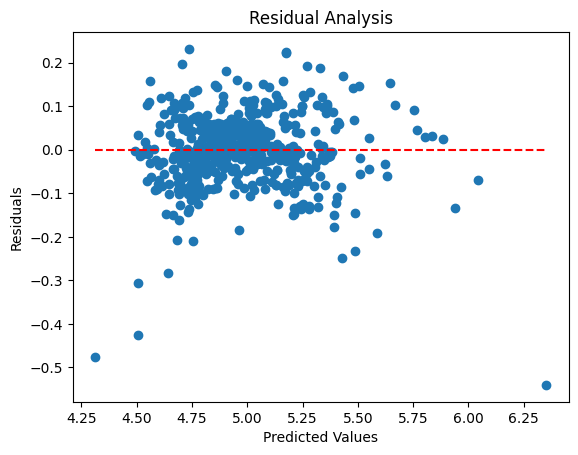

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_cyl,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_transmission_type_Others,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,coe_price,predicted_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,4,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,8,1,98062,46320.064274
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,6,1,98062,81286.978465
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,4,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,7,1,98062,66853.708602
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,6,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,178182.575208
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,6,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,6,2,98062,124562.493938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,2,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,6,3,98062,408163.530416
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,4,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,166501.417929
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,6,1,98062,191251.999601
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,6,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,8,3,98062,590567.420695


In [28]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

# Calculate R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adjusted_r2}")

#plotting True VS Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price = linear_regressor.predict(x)
linear_regressor_predicted = data.copy()
linear_regressor_predicted['predicted_price'] = np.power(10, predicted_price)
linear_regressor_predicted

# Best Lasso

Best alpha: 0.001
MAE: 0.05887963742771526
MSE: 0.006895725726053843
RMSE: 0.08304050653779661
R^2: 0.906710586097872
Adjusted R^2: 0.9014200711317778


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


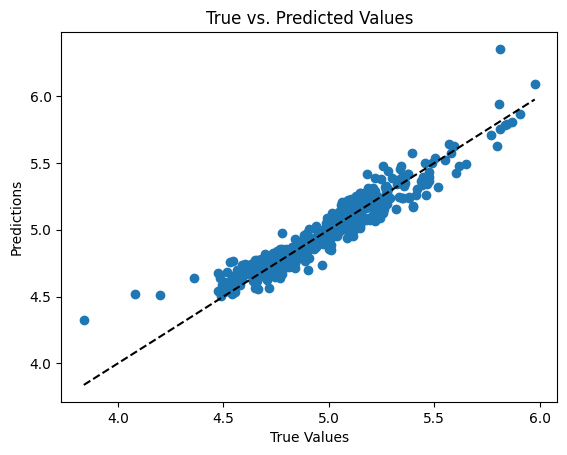

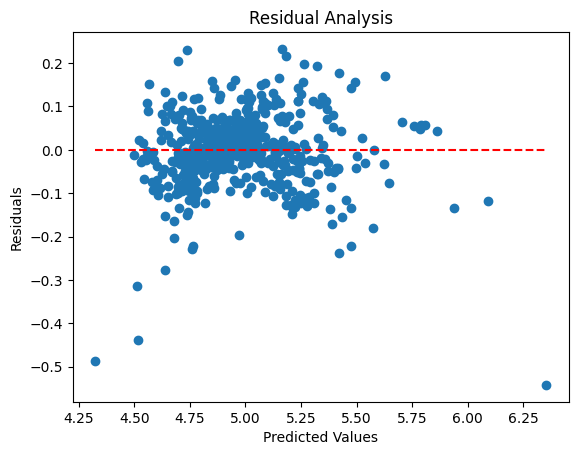

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_cyl,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_transmission_type_Others,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,coe_price,predicted_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,4,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,8,1,98062,47191.029443
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,6,1,98062,81335.338054
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,4,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,7,1,98062,67834.842403
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,6,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,173247.078063
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,6,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,6,2,98062,122905.761800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,2,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,6,3,98062,406289.487343
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,4,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,166060.487027
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,6,1,98062,193084.926469
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,6,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,8,3,98062,579776.935270


In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


lasso = Lasso()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

#looping through to find best alpha value
grid_search = GridSearchCV(estimator=lasso, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lasso = grid_search.best_estimator_
y_pred = lasso.predict(X_test)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Calculate R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adjusted_r2}")

#plotting True VS Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price = lasso.predict(x)
lasso_predicted_results = data.copy()
lasso_predicted_results['predicted_price'] = np.power(10, predicted_price)
lasso_predicted_results

# Decision Tree

MAE: 0.033433146340210905
MSE: 0.0031830508854753985
RMSE: 0.05641853317373112
R^2: 0.9569378244838372
Adjusted R^2: 0.9544957351350946


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


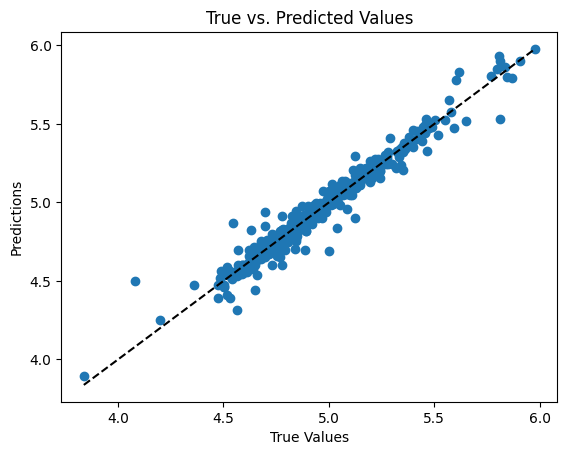

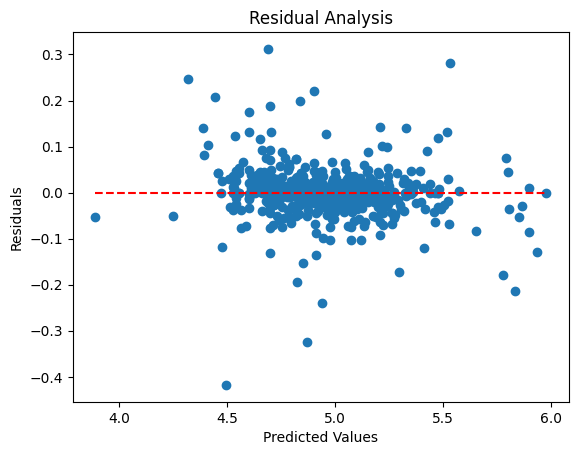

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_cyl,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_transmission_type_Others,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,coe_price,predicted_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,4,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,8,1,98062,41800.0
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,6,1,98062,88800.0
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,4,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,7,1,98062,65800.0
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,6,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,245000.0
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,6,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,6,2,98062,164999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,2,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,6,3,98062,498164.0
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,4,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,238800.0
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,6,1,98062,230788.0
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,6,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,8,3,98062,378800.0


In [30]:
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

#Calculating R Squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adjusted_r2}")

#plotting True VS Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price = dt_regressor.predict(x)
dt_predicted = data.copy()
dt_predicted['predicted_price'] = np.power(10, predicted_price)
dt_predicted

# Random Forest

MAE: 0.022652922979299276
MSE: 0.0016741668939659659
RMSE: 0.04091658458334427
R^2: 0.9773508903171229
Adjusted R^2: 0.9760664417528765


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


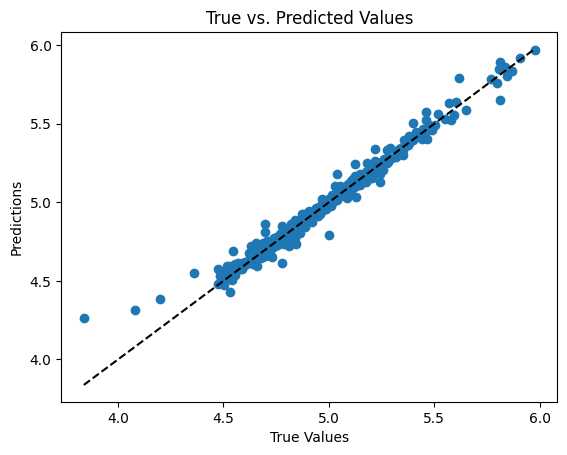

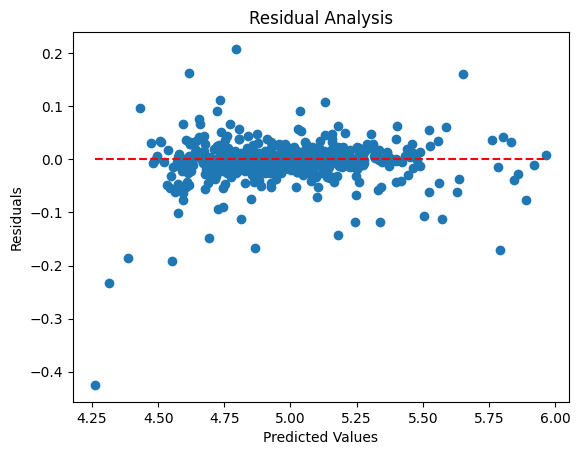

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_cyl,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_transmission_type_Others,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,coe_price,predicted_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,4,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,8,1,98062,44072.304380
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,6,1,98062,89473.249899
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,4,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,7,1,98062,66214.632282
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,6,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,231901.033859
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,6,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,6,2,98062,164669.562885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,2,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,6,3,98062,514534.566084
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,4,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,7,3,98062,229440.065589
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,6,1,98062,231922.460144
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,6,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,8,3,98062,393671.188035


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

# Calculating R-Squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {adjusted_r2}")

#plotting True VS Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price = rf_regressor.predict(x)
rf_predicted = data.copy()
rf_predicted['predicted_price'] = np.power(10, predicted_price)
rf_predicted

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# For regression, it's common to use negative mean squared error as the scoring method
scores = cross_val_score(rf_regressor, independent_vars, Y, cv=10, scoring='neg_mean_squared_error')

mean_mse = -scores.mean()  # Negate to get positive MSE
rmse = mean_mse ** 0.5  # Calculate RMSE from MSE

print(f"Mean MSE from 10-fold CV: {mean_mse}")
print(f"Mean RMSE from 10-fold CV: {rmse}")


Mean MSE from 10-fold CV: 0.0017230062651884385
Mean RMSE from 10-fold CV: 0.041509110628733525


The cross-validation results show a Mean MSE of approximately 0.0017 and a Mean RMSE of approximately 0.0415. These values are quite close to the ones previously reported from a single train-test split (MSE: 0.001674, RMSE: 0.0409), which suggests the model is performing consistently across different subsets of your data and is not likely to be overfitted